Day: Wed, 24th April, 2024<br>
Name: <b>SARTHAK KIRAN GIRME</b><br>
Roll No.: 23370<b>16</b>
# CNN Object Detection: Performance Metrics
## SL-2 Practical No. 10

<b>Statment: </b><i> Write Python program to implement `CNN Object Detection`. Discuss numerous `Performance EevaluationMmetric`s for evaluating the object detecting algorithms' performance.</i>
<hr>

## Packages

In [1]:
# pip install tensorflow

In [2]:
# pip install scikit-learn

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers

<hr>

## Dataset: CIFAR10

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()   # this requires Internet for downloading

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

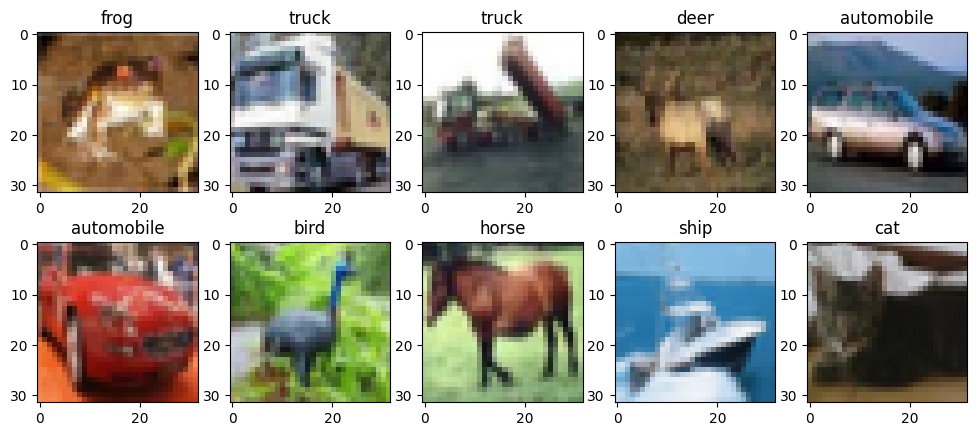

In [7]:
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train.reshape(-1,)[i]])

<hr>

## Normalization: Min-Max

In [8]:
x_train[111].flatten()

array([135, 160, 179, ..., 139, 139, 140], dtype=uint8)

In [9]:
x_train = x_train/255.0
x_test  = x_test/255.0

In [10]:
x_train[111].flatten()

array([0.52941176, 0.62745098, 0.70196078, ..., 0.54509804, 0.54509804,
       0.54901961])

<hr>

## Graphs: Generic code

In [11]:
def Graphs(accuracy, loss, val_accuracy, val_loss, epochs):
    # Create a figure and axis object
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    # Plot the first subplot (Training Accuracy)
    ax1.plot(epochs, accuracy, 'y', label='Training Accuracy')
    ax1.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    ax1.set_title('Accuracy Graph')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    # Plot the second subplot (Training Loss)
    ax2.plot(epochs, loss, 'y', label='Training Loss')
    ax2.plot(epochs, val_loss, 'r', label='Validation Loss')
    ax2.set_title('Loss Graph')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    # Adjust layout
    plt.tight_layout()
    # Show the figure
    plt.show()

<hr>

## Model Building

In [12]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (4,4), activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (4,4), activation='relu'),
    layers.Flatten(),
    layers.Dense(64 , activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax'),
])

C:\Users\SHREYAS\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Model Training

In [14]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size= 32, epochs=10)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 53ms/step - accuracy: 0.2910 - loss: 1.8977 - val_accuracy: 0.5301 - val_loss: 1.3748
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.5269 - loss: 1.3303 - val_accuracy: 0.6047 - val_loss: 1.1707
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.6020 - loss: 1.1329 - val_accuracy: 0.6220 - val_loss: 1.0673
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.6365 - loss: 1.0347 - val_accuracy: 0.6436 - val_loss: 1.0193
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.6741 - loss: 0.9421 - val_accuracy: 0.6606 - val_loss: 0.9959
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 60ms/step - accuracy: 0.6914 - loss: 0.8739 - val_accuracy: 0.6867 - val_loss: 0.9203
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 66ms/step - accuracy: 0.7132 - loss: 0.8105 - val_accuracy: 0.6981 - val_loss: 0.8646
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 60ms/step - accuracy: 0.7284 -

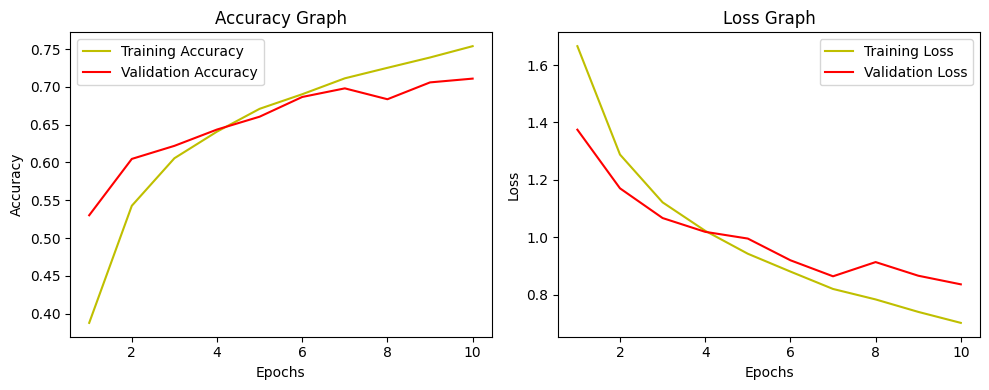

In [18]:
Graphs(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'], range(1, len(history.history['accuracy'])+1))

<hr>

## Performance Evaluation

In [19]:
# On Test-Set
loss, accu = model.evaluate(x_test, y_test)
print('Accuracy: ',accu*100,'%')
print('Loss: ', loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6982 - loss: 0.8710
Accuracy:  69.84000205993652 %
Loss:  0.8743044137954712


#### Classification Report: on Test-Set

In [23]:
prob = model.predict(x_test)
predi = [np.argmax(i) for i in prob]
print(classification_report(y_test, predi))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1000
           1       0.87      0.80      0.83      1000
           2       0.63      0.53      0.58      1000
           3       0.45      0.65      0.53      1000
           4       0.62      0.69      0.66      1000
           5       0.67      0.45      0.54      1000
           6       0.70      0.82      0.76      1000
           7       0.78      0.70      0.74      1000
           8       0.84      0.81      0.82      1000
           9       0.80      0.78      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



<hr>

## Save Model: CIFAR10

In [24]:
model.save('CIFAR10.h5')

<hr>

## Object Detection

In [25]:
model = models.load_model('CIFAR10.h5')

In [26]:
def ObjectDetection(threshold):
    path = str(input('Enter path of Image: '))
    img  = tf.io.read_file(path)
    img  = tf.image.decode_jpeg(img, channels=3)
    plt.imshow(img)
    img  = tf.image.resize(img, [32,32])
    img  = img / 255.0
    img  = tf.expand_dims(img, axis=0)
    # Model: Object Detection
    probabilities = model.predict(img)
    class_indices = [i for i, prob in enumerate(probabilities.reshape(-1,)) if prob>=threshold]
    label= [classes[i] for i in class_indices]
    print(f"\u2022 Detected Objects: {label}")

Enter path of Image:  Testing/DEER.jpeg.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
• Detected Objects: ['deer']


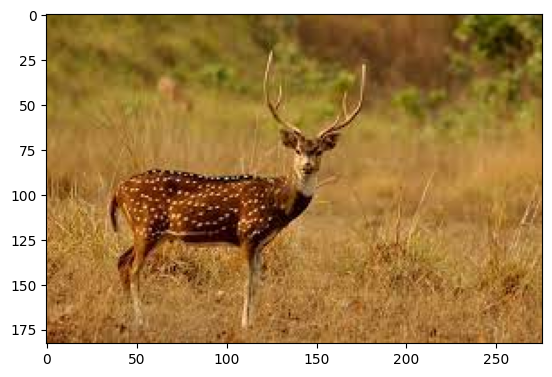

In [30]:
ObjectDetection(0.5)

Enter path of Image:  Testing/ship.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
• Detected Objects: ['ship']


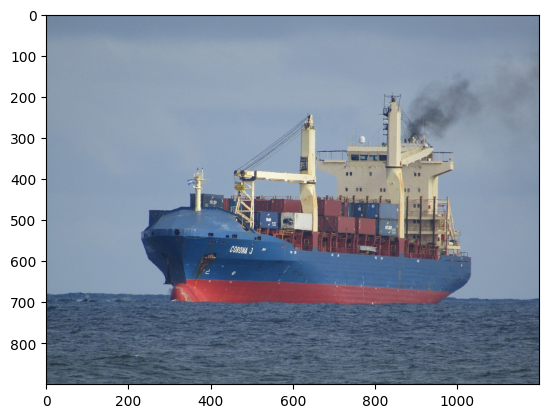

In [31]:
ObjectDetection(0.1)

Enter path of Image:  Testing/dog.jpeg.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
• Detected Objects: ['deer', 'dog']


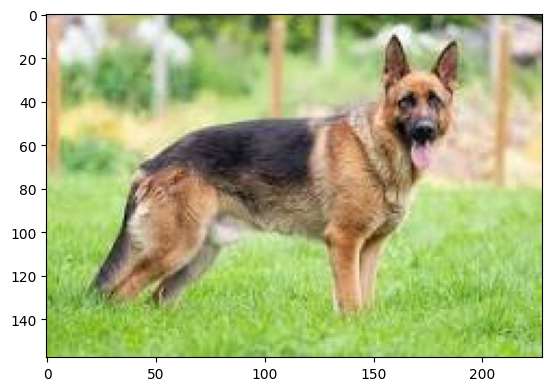

In [42]:
ObjectDetection(0.09)

<hr>